# Leonardo Sanchez Roncancio

In [60]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyproj
from scipy import stats
import warnings

In [2]:
df = pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")
df.head()

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065

## Identificar los datos nullos

<Axes: >

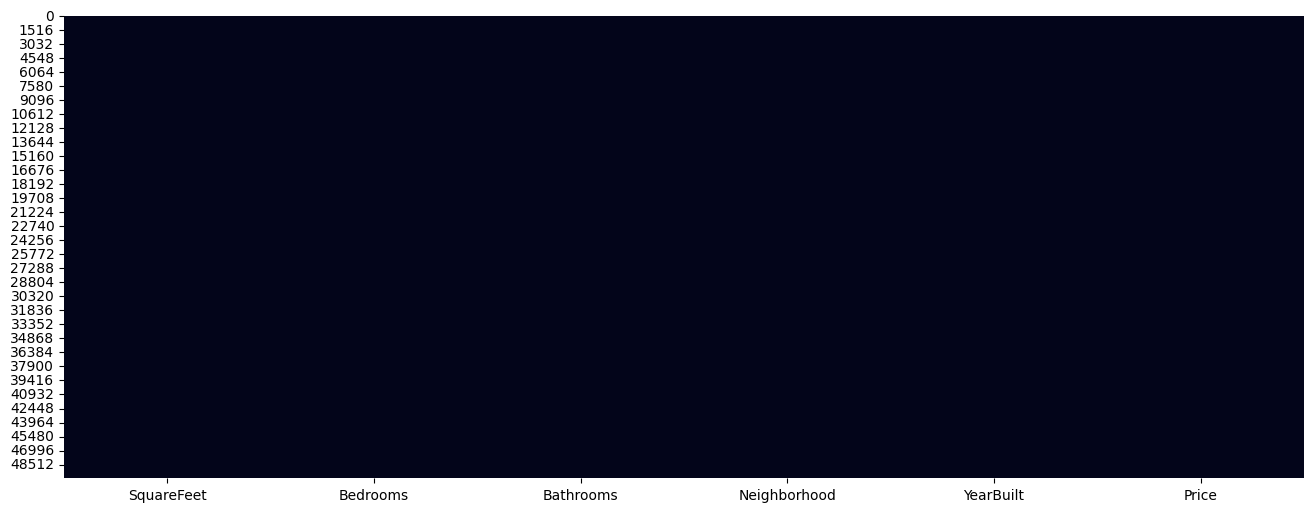

In [3]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)

In [22]:
df.describe(include=np.number)

SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151   
std      575.513241      1.116326      0.815851     20.719377   76141.842966   
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397   
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225   
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166   
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052   
max     2999.000000      5.000000      3.000000   2021.000000  492195.259972   

       Neighborhood_num  
count      50000.000000  
mean           0.998540  
std            0.815838  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            2.000000  
max            2.000000

Ninguna columna tiene datos nulos

## Columna "SquareFeet" = pies cuadrados

In [4]:
df["SquareFeet"].unique()

array([2126, 2459, 1860, ..., 2864, 2330, 2084])

In [5]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=df["SquareFeet"], name = "Violin"), row=1, col=1)
fig.add_trace(go.Histogram(x=df["SquareFeet"], nbinsx=50, name = "Histograma"), row=1, col=2)
fig.update_layout(width=950, height=400, title="Graficas de violin de SquareFeet")
fig.show()


Tiene una distribucion uniforme

## Columna "Bedrooms" = Dormitorios

In [6]:
df["Bedrooms"].unique()

array([4, 3, 2, 5])

In [7]:
Dormitorios = df['Bedrooms'].value_counts().reset_index()
Dormitorios.columns = ['Bedrooms', 'Count']
Dormitorios

Bedrooms  Count
0         3  12661
1         5  12468
2         2  12436
3         4  12435

In [8]:
fig = px.bar(Dormitorios, x='Bedrooms', y='Count', title='Número de habitaciones por cantidad')
fig.show()

Distribucion uniforme

## Columna "Neighborhood" = vencindario

In [21]:
df.describe(include='O')

Neighborhood
count         50000
unique            3
top          Suburb
freq          16721

In [9]:
df["Neighborhood"].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [10]:
fig = px.histogram(df, x='Neighborhood', title='Histograma de Vecindarios')
fig.show()

## Columna "YearBuilt" = Año de construccion

In [11]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=df["YearBuilt"], name = "Violin"), row=1, col=1)
fig.add_trace(go.Histogram(x=df["YearBuilt"], nbinsx=74, name = "Histograma"), row=1, col=2)
fig.update_layout(width=950, height=400, title="Graficas de violin de SquareFeet")
fig.show()

## Columna "Price" = precio

In [12]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=df["Price"], name = "Violin"), row=1, col=1)
fig.add_trace(go.Histogram(x=df["Price"], nbinsx=50, name = "Histograma"), row=1, col=2)
fig.update_layout(width=950, height=400, title="Graficas de violin de SquareFeet")
fig.show()

# eliminar outlayer con z score

No tiene sentido que hayan precios negativos, o se deberia averiguar el por que

In [33]:
z_scores = stats.zscore(df['Price'])
threshold = 2
df_no_outliers = df[(z_scores < threshold) & (z_scores > -threshold)]

In [40]:
fig = make_subplots(rows=2, cols=2, subplot_titles=["Precio original", "Precion sin outiers"])
fig.add_trace(go.Box(y=df["Price"], name = "Violin original"), row=1, col=1)
fig.add_trace(go.Histogram(x=df["Price"], nbinsx=50, name = "Histograma"), row=2, col=1)

fig.add_trace(go.Box(y=df_no_outliers["Price"], name = "Violin sin outliers"), row=1, col=2)
fig.add_trace(go.Histogram(x=df_no_outliers["Price"], nbinsx=50, name = "Histograma"), row=2, col=2)

fig.update_layout(width=950, height=800, title="Graficas con y sin outliers")

fig.show()

In [53]:
print("Porcentaje de outliers: ", round((len(df) - len(df_no_outliers)) / len(df) * 100, 2), "%")

Porcentaje de outliers:  3.69 %


<Axes: >

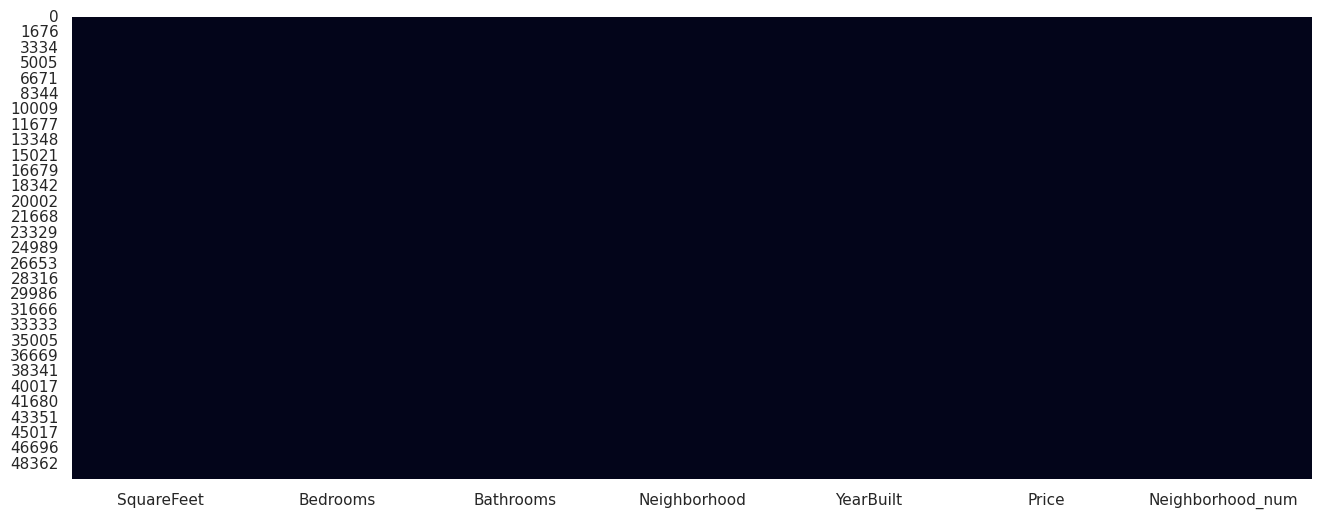

In [63]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_no_outliers.isnull(), cbar=False)

# Correlacion

Se crea una nueva columna para convertir la columna de Neighborhood a numerica

In [41]:
df_no_outliers['Neighborhood_num'] = df_no_outliers['Neighborhood'].astype('category').cat.codes

/tmp/ipykernel_42/2477430343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
df_numericos = df_no_outliers.drop("Neighborhood", axis=1)

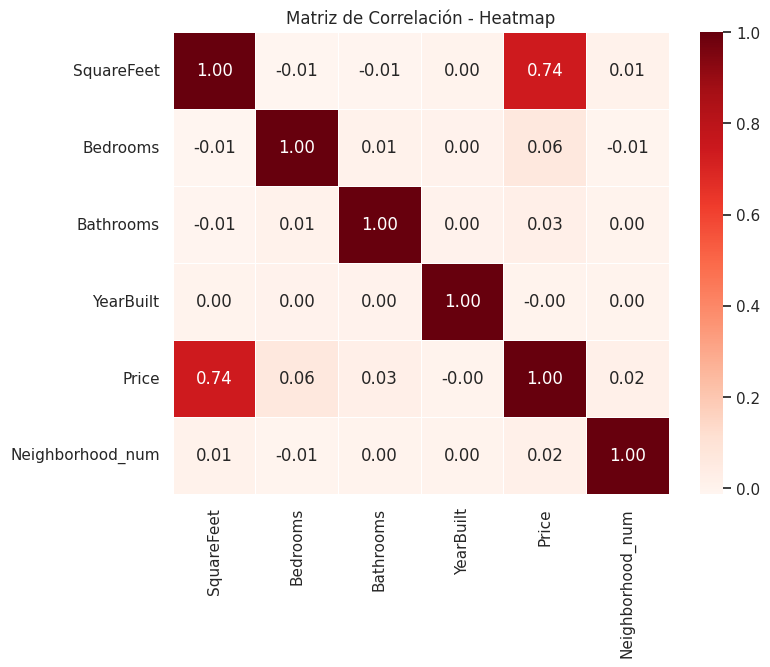

In [43]:
# no hay correlaciones negativas entonces los valores van solo entre 0 y 1
corr_matrix = df_numericos.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación - Heatmap')
plt.show()

La unica correlacion significativa esta entre precio y metros cuadrados, con una correlacion positiva del 74%

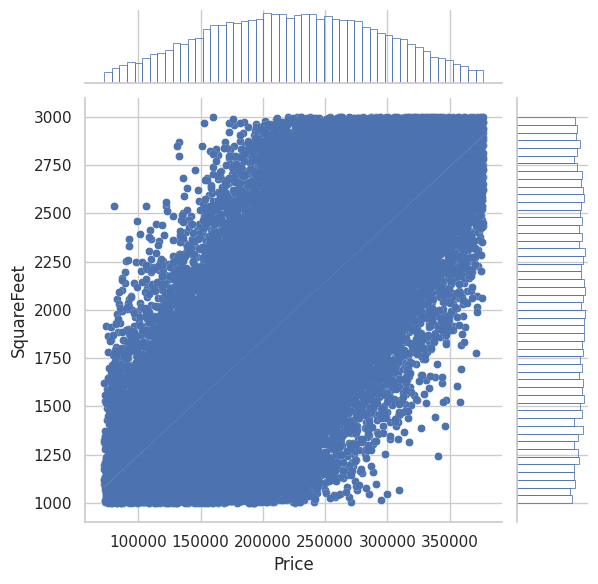

In [46]:
sns.set(style="whitegrid")
g = sns.jointplot(x='Price', y='SquareFeet', data=df_no_outliers, kind='scatter', marginal_kws=dict(bins=50, fill=False))
g.plot_joint(sns.regplot, scatter_kws={"s": 20, 'alpha':0.7})
plt.show()

## Trasformacion logaritmica 

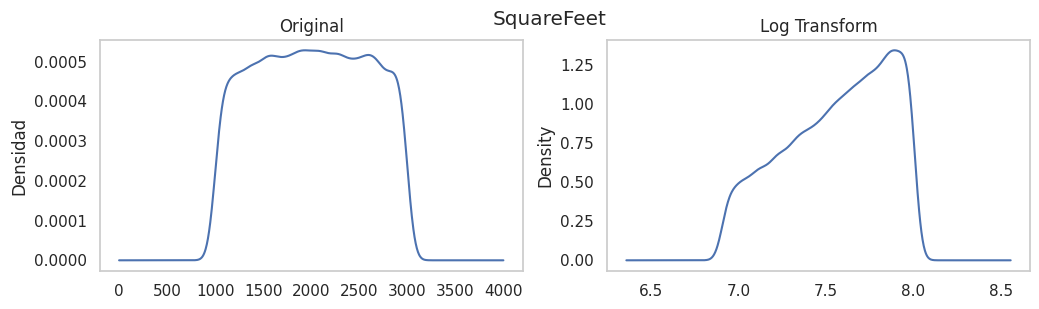

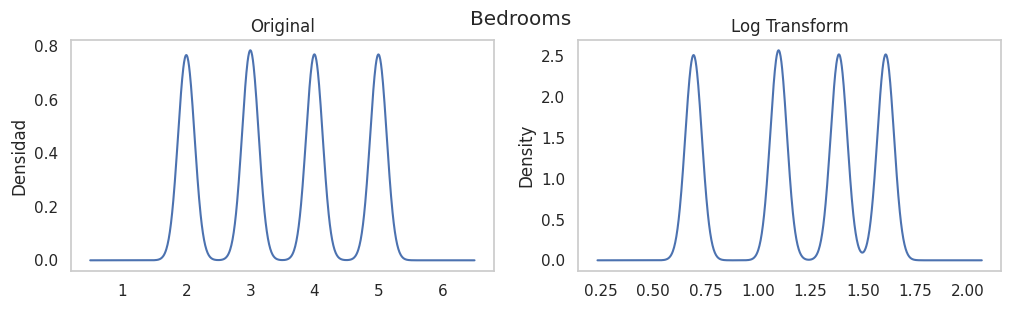

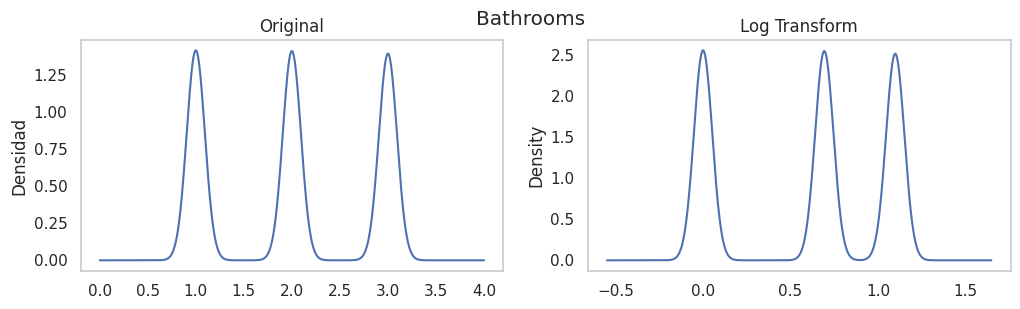

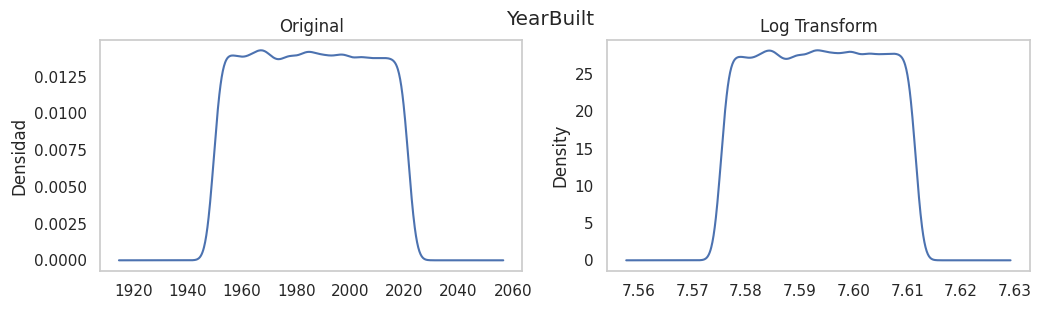

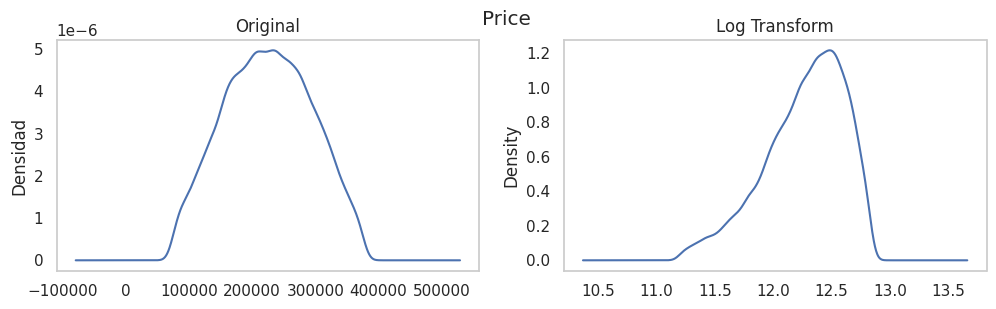

In [83]:
# Transformación: Log Transform
for num_col in df_no_outliers.select_dtypes(include=np.number).columns:
    if num_col != "Neighborhood_num" :
        fig, ax =plt.subplots(1,2)

        df_no_outliers[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
        np.log(df_no_outliers[num_col]).plot.density(figsize=(12, 3), grid=False, ax=ax[1])

        ax[0].title.set_text('Original')
        ax[1].title.set_text('Log Transform')
        ax[0].set_ylabel('Densidad')
        fig.suptitle(num_col)
        warnings.simplefilter("ignore")
        plt.show()
    else: 
        pass

#  Min max escaler

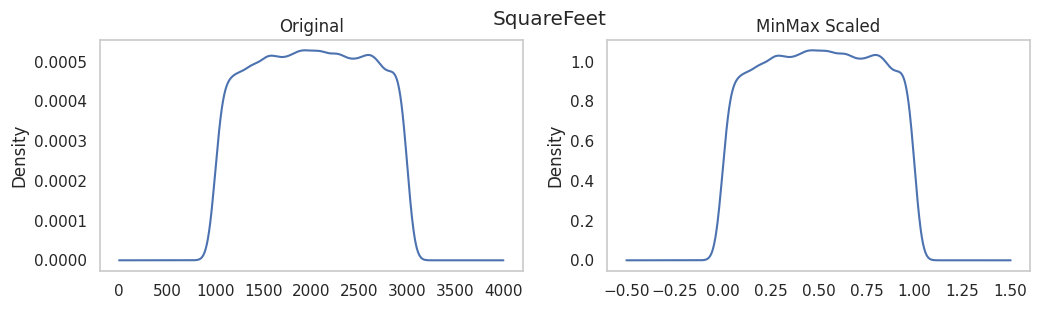

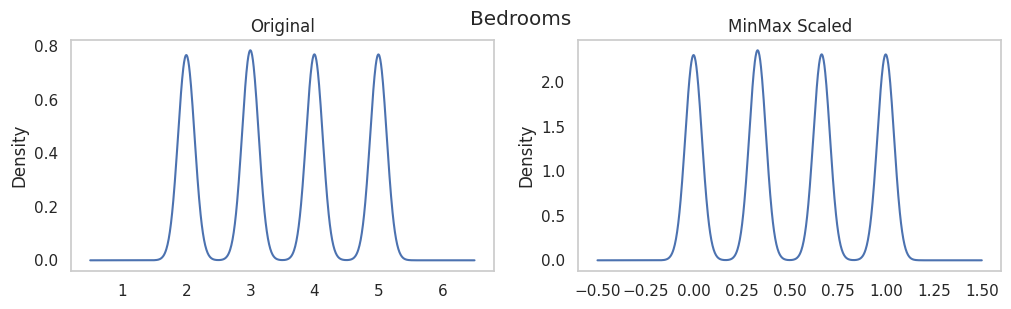

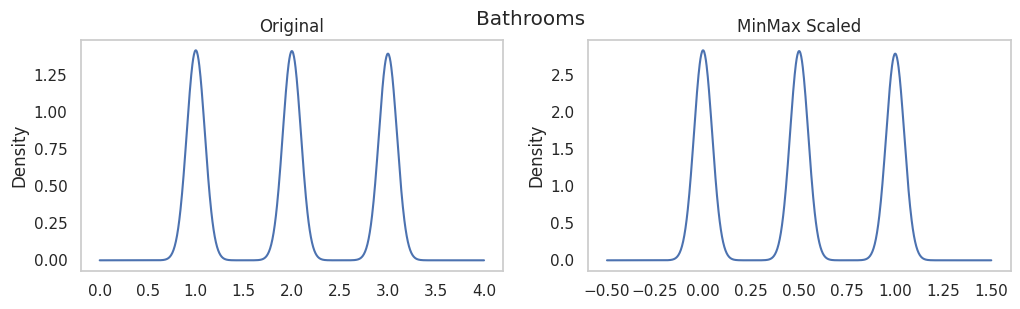

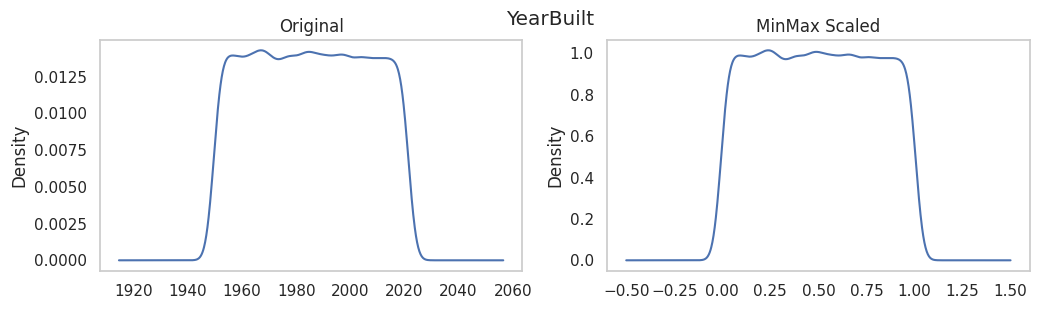

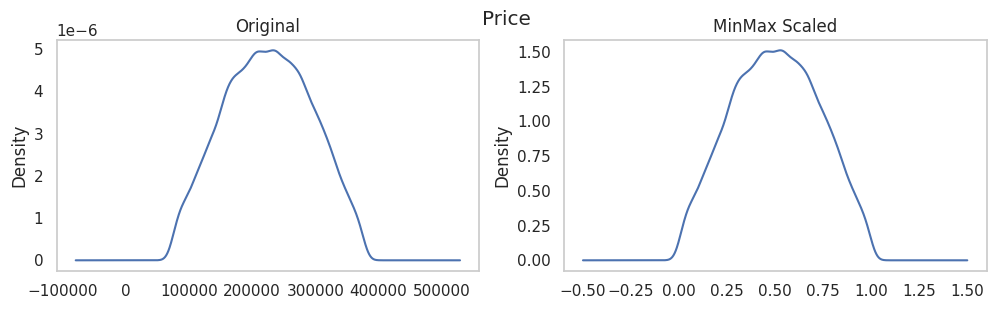

In [84]:
# Transformación: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_no_outliers.copy()
df_scaled[df_scaled.select_dtypes(include=np.number).columns] = scaler.fit_transform(df_scaled.select_dtypes(include=np.number))

for num_col in df_no_outliers.select_dtypes(include=np.number).columns:
    if num_col != "Neighborhood_num" :
        fig, ax =plt.subplots(1,2)

        df_no_outliers[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
        df_scaled[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[1])

        ax[0].title.set_text('Original')
        ax[1].title.set_text('MinMax Scaled')
        ax[0].set_ylabel('Density')
        fig.suptitle(num_col)
        plt.show()
        
    else: 
        pass

MinMax escaler mentiene mejor la distribucion de los datos como se puede ver en las graficas 

# Identificar los duplicados

In [70]:
df.duplicated().sum()

0

# Confirmar que los valores estan normalizado o en una misma escala, con min max escaler

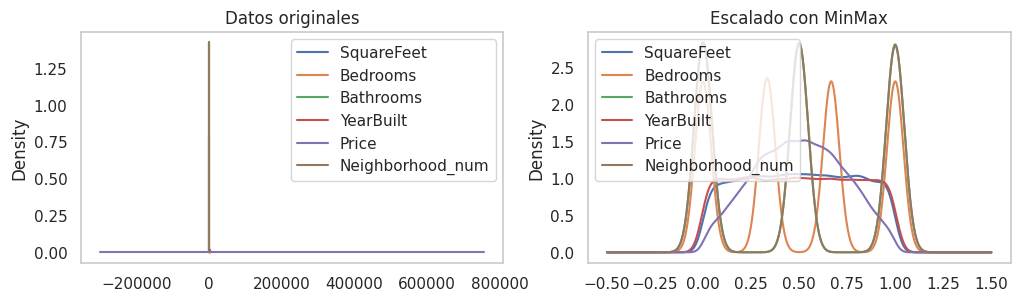

In [89]:
fig, ax =plt.subplots(1,2)

df.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_scaled.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Datos originales')
ax[1].title.set_text('Escalado con MinMax')

plt.show()

## Discretización 

In [94]:
df_scaled['Price_bins'] = pd.cut(df_scaled['Price'].values, bins = 5 , labels=[0, 1, 2, 3, 4])
df_scaled['Price_bins'].value_counts()

Price_bins
2    14380
3    11729
1    11623
4     5224
0     5200
Name: count, dtype: int64

In [95]:
df_scaled['SquareFeet_bins'] = pd.cut(df_scaled['SquareFeet'].values, bins = 5 , labels=[0, 1, 2, 3, 4])
df_scaled['SquareFeet_bins'].value_counts()

SquareFeet_bins
2    10134
3     9896
1     9770
4     9362
0     8994
Name: count, dtype: int64

In [98]:
pd.qcut(df_scaled['SquareFeet'], q=4)

0         (0.505, 0.746]
1         (0.505, 0.746]
2         (0.264, 0.505]
3         (0.505, 0.746]
4         (0.505, 0.746]
              ...       
49993    (-0.001, 0.264]
49994     (0.505, 0.746]
49995    (-0.001, 0.264]
49996       (0.746, 1.0]
49999     (0.264, 0.505]
Name: SquareFeet, Length: 48156, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 0.264] < (0.264, 0.505] < (0.505, 0.746] < (0.746, 1.0]]

In [101]:
df_scaled['SquareFeet_q4'] =  pd.qcut(df_scaled['SquareFeet'], q=4, labels=[0, 1, 2, 3])
df_scaled['SquareFeet_q4'].value_counts()

SquareFeet_q4
1    12058
0    12039
3    12035
2    12024
Name: count, dtype: int64

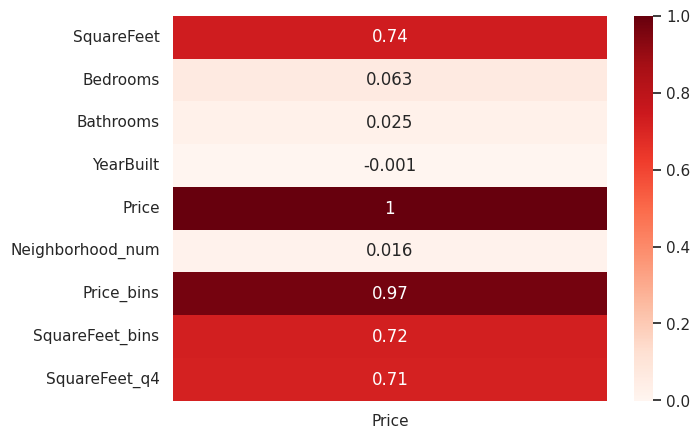

In [104]:
#### Correlación de Pearson/Spearman

df_scaled2 = df_scaled.drop("Neighborhood", axis=1)

target_correlation = df_scaled2.corr(method='pearson')[['Price']]  # method = 'spearman'

plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

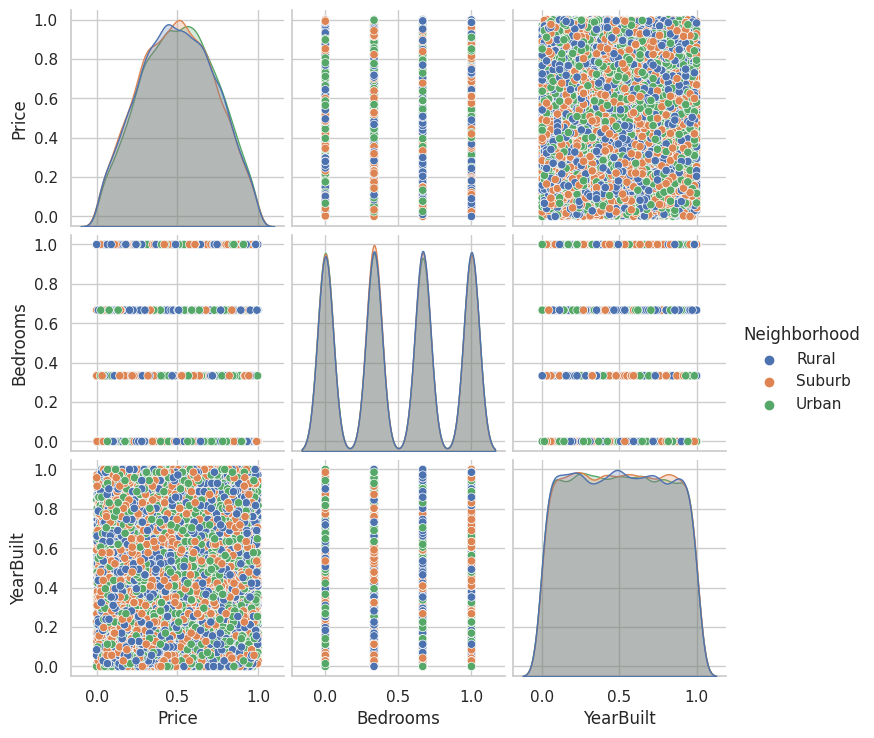

In [113]:
df_pairplot = df_scaled[["Price","Bedrooms","YearBuilt","Neighborhood"]]
sns.pairplot(df_pairplot, hue="Neighborhood")

# Crear nuevas variables = precio por metro cuadrado

In [114]:
df_scaled["Price-SquareFeet"] = df_scaled["Price"]/df_scaled["SquareFeet"]

## K-fold cross-validation

In [117]:
from sklearn.model_selection import KFold
SEED = 0 
X = df_scaled.drop('Price', axis=1)
y = df_scaled.Price
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
fold_count = 1

for train_index, test_index in cv.split(X, y):
    print(f'Fold:{fold_count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    fold_count += 1

Fold:1, Train set: 38524, Test set:9632
Fold:2, Train set: 38525, Test set:9631
Fold:3, Train set: 38525, Test set:9631
Fold:4, Train set: 38525, Test set:9631
Fold:5, Train set: 38525, Test set:9631
